▶ **Partie 1 : Préparation des données** ◀


Avant de commencer à créer nos modèles, il est important d'étudier nos données. Cela passe par les comprendre, les analyser, les mettre en forme et corriger les futurs biais potentiels. 


- 1 - Importation des données sous un DataFrame,
- 2 - Récupération des variables numériques,
- 3 - Suppression des doublons en fonction des numéros de téléphones,
- 4 - Suppression des variables qui sont des constantes (aucune importance pour la prédiction),
- 5 - Transformations des NA,
- 6 - Détection & suppression des outliers,
- 7 - Création de la variable à expliquer,
- 8 - Séparation de nos données en jeu d'entrainement et jeu de test,
- 9 - Téléchargement des deux jeux créés,
- 10 - Création d'un sample des jeux.

▶ Import des différentes librairies :

In [25]:
from google.colab import drive
from google.colab import files
drive.mount('/content/gdrive')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import ipywidgets as widgets

from sklearn.model_selection import train_test_split

import seaborn as sns


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


▶ 1 - Importation des données sous un DataFrame : 

Affichage des 5 premières et 5 dernières lignes.



In [26]:
df_data = pd.read_csv ("/content/gdrive/My Drive/Colab Notebooks/CHURN/DATA/telecom_churn_data.csv")
 
df_data.head()
df_data.tail()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,...,0,NaN,NaN,NaN,NaN,3199,0.00,0.00,0.00,0.0
99995,7000607688,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,112.201,...,0,NaN,NaN,NaN,NaN,2052,0.00,0.00,0.00,0.0
99996,7000087541,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,229.187,...,0,1.0,NaN,NaN,NaN,185,0.00,0.00,0.00,0.0
99997,7000498689,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,322.991,...,0,1.0,1.0,1.0,1.0,478,1445.74,1151.03,1173.18,0.0
99998,7001905007,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,687.065,...,0,1.0,NaN,NaN,NaN,751,0.00,0.00,0.00,0.0


Analyse des différents types de variable de nos données (float, int, object).

On a 99 999 observations pour 226 variables explicatives. 

In [27]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


Pour chaque variable, on regarde les différentes statistiques permettant de déceler des variables moins pertinentes et/ou des outliers - erreurs. 

In [28]:
df_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


▶ 2 - Récupération des variables numériques :
  - 214 variables
  - 99999 observations

In [29]:
print("Old shape : ", df_data.shape)
df_data = df_data.select_dtypes(["number"])
print("New shape : ", df_data.shape)

Old shape :  (99999, 226)
New shape :  (99999, 214)


▶ 3 - Suppression des doublons en fonction des numéros de téléphones :
  - Aucun trouvé

▶ 4 - Suppression des variables qui sont des constantes (aucune importance pour la prédiction) : 
  - circle_id
  - loc_og_t2o_mou
  - std_og_t2o_mou
  - loc_ic_t2o_mou
  
Donc : 
  - 210 variables
  - 99999 observations



In [30]:
## Suppression des doublons 
print("Old shape : ", df_data.shape)
df_data.drop_duplicates(subset=["mobile_number"], keep="first")
print("New shape /w doublons : ", df_data.shape)


#Suppressions des variables qui sont des constantes 
del df_data['circle_id']
del df_data['loc_og_t2o_mou']
del df_data['std_og_t2o_mou']
del df_data['loc_ic_t2o_mou']
print("New shape /w variables constantes : ", df_data.shape)

Old shape :  (99999, 214)
New shape /w doublons :  (99999, 214)
New shape /w variables constantes :  (99999, 210)


▶ 5 - Transformations des NA : 

On passe à :
  - 174 variables
  - 99999 observations

In [31]:
# fonction qui va renvoyer True si un nom de colonne appartient à la liste des variables binaires, False sinon
def is_binary(list_binary, nom_column):
  if(nom_column in list_binary):
    print(nom_column)
    return True
  else :
    return False



print("Old shape : ", df_data.shape)

# pour chaque colonne on calcul son % de na 
missing_rate = df_data.isna().sum()/df_data.shape[0]
print(missing_rate)

nom_column = df_data.columns.tolist()
colomn_del = []
valeur_del = []

# on récupère toutes les colonnes qui sont binaires dans une liste, une variable est binaire si elle prend les valeurs 0 / 1 / nan
list_binary = df_data.columns[df_data.isin([0,1, float('nan')]).all()]
print(list_binary + " est binaire")

# pour toutes les variables :
# si le taux de valeurs na est > 0.1 => on supprime la variable
# si < 0.1 & binaire => on remplace par 0
# si <0.1 & non-binaire => on remplace par la médianne de la colonne
for i in range(0, len(missing_rate)) : 
  if(missing_rate[i] > 0.1):
    valeur_del.append(missing_rate[i])
    colomn_del.append(nom_column[i])
    df_data.drop(nom_column[i], axis=1, inplace=True)
  else:
    if(is_binary(list_binary, nom_column[i])):
      df_data.fillna(0, inplace=True)
    else :
      df_data.fillna(df_data[nom_column[i]].median(), inplace=True)

print(colomn_del)
print(valeur_del)
print(df_data.isna().sum().sum())


print("New shape : ", df_data.shape)

Old shape :  (99999, 210)
mobile_number    0.0
arpu_6           0.0
arpu_7           0.0
arpu_8           0.0
arpu_9           0.0
                ... 
aon              0.0
aug_vbc_3g       0.0
jul_vbc_3g       0.0
jun_vbc_3g       0.0
sep_vbc_3g       0.0
Length: 210, dtype: float64
Index(['std_og_t2c_mou_6 est binaire', 'std_og_t2c_mou_7 est binaire',
       'std_og_t2c_mou_8 est binaire', 'std_og_t2c_mou_9 est binaire',
       'std_ic_t2o_mou_6 est binaire', 'std_ic_t2o_mou_7 est binaire',
       'std_ic_t2o_mou_8 est binaire', 'std_ic_t2o_mou_9 est binaire',
       'night_pck_user_6 est binaire', 'night_pck_user_7 est binaire',
       'night_pck_user_8 est binaire', 'night_pck_user_9 est binaire',
       'fb_user_6 est binaire', 'fb_user_7 est binaire',
       'fb_user_8 est binaire', 'fb_user_9 est binaire'],
      dtype='object')
std_og_t2c_mou_6
std_og_t2c_mou_7
std_og_t2c_mou_8
std_og_t2c_mou_9
std_ic_t2o_mou_6
std_ic_t2o_mou_7
std_ic_t2o_mou_8
std_ic_t2o_mou_9
['total_rech_dat

▶ 6 - Détection & suppression des outliers : 

L'idée est de supprimer / limiter les valeurs aberrantes tout en gardant une base qui est cohérente et qui reste utiisable.

S'ils ont veut supprimer l'entiereté des outliers, on devrait supprimer la totalité des observations. Donc, on doit accepter d'avoir des outliers et de le prendre en compte dans la création des modèles et leur robustesse.

De ce fait, nous supprimons les observations qui sont, par variable :
- Supérieur à (la moyenne de la variable + 1 fois l'écart type de la variable)
- Inférieur à (") 

On passe à :
  - 174 variables
  - 72495 observations

In [32]:
# fonction qui detecte les outliers par variable et retourne leurs index
def outliers(df, nom_column):
  
  #Q1 = df[nom_column].quantile(0.25)
  #Q3 = df[nom_column].quantile(0.75)

  Q1 = df[nom_column].mean() - 1 * df[nom_column].std()
  Q3 = df[nom_column].mean() + 1 * df[nom_column].std()
  IQR = Q3 - Q1

  lb = Q1 - 1.5 * IQR
  ub = Q3 + 1.5 * IQR
  
  ls = df.index[ (df[nom_column] < lb) | (df[nom_column] > ub)]
  #print(len(ls))
  
  return ls

# fonction qui va supprimer un ensemble de ligne (en fonction de leur index) et renvoyer le df associé
def remove(df, list_to_del):
  list_to_del = sorted(set(list_to_del))
  df = df.drop(list_to_del)
  return df

print("Old shape : ", df_data.shape)
nom_column = df_data.columns.tolist()
index_list = []

list_binary = df_data.columns[df_data.isin([0,1, float('nan')]).all()]
print(list_binary + " est binaire")

# on initie et construit la liste des index (on pense à supprimer les doublons à chaque itération)
for element in nom_column :
  if(is_binary(list_binary, element)==False):
    index_list.extend(outliers(df_data, element))
    index_list = list(set(index_list))
print(index_list)
print(len(index_list))

# on supprime les outliers de notre df
df_data = remove(df_data, index_list)

print("New shape : ", df_data.shape)

Old shape :  (99999, 174)
Index([], dtype='object')
[0, 6, 7, 10, 15, 23, 26, 33, 35, 37, 45, 46, 48, 51, 56, 57, 63, 64, 67, 68, 73, 77, 81, 86, 87, 91, 103, 104, 105, 107, 111, 115, 119, 120, 124, 125, 129, 133, 138, 143, 144, 145, 147, 149, 154, 157, 158, 161, 164, 166, 170, 173, 176, 177, 180, 182, 185, 188, 191, 193, 194, 195, 201, 202, 204, 206, 208, 212, 213, 216, 218, 222, 224, 227, 228, 232, 236, 239, 241, 246, 248, 256, 263, 265, 269, 270, 275, 276, 277, 279, 284, 285, 287, 290, 292, 304, 320, 322, 324, 330, 335, 339, 346, 349, 355, 357, 358, 361, 364, 366, 370, 371, 375, 378, 380, 391, 392, 393, 398, 402, 404, 407, 408, 413, 414, 416, 423, 428, 431, 435, 451, 457, 463, 476, 479, 484, 489, 490, 496, 500, 502, 507, 512, 515, 523, 525, 527, 528, 529, 536, 538, 539, 548, 552, 553, 561, 562, 566, 567, 568, 571, 573, 577, 578, 582, 588, 593, 595, 603, 609, 613, 616, 626, 632, 633, 638, 640, 642, 646, 652, 657, 658, 661, 665, 674, 679, 684, 687, 690, 692, 696, 699, 704, 706, 712, 7

⚙ Widget de python pour afficher, en fonction de la variable selectionner, le boxplot associé permettant de voir les outliers restants 

In [33]:
nom_column = df_data.columns.tolist()
dropdown_nom_column = widgets.Dropdown(options = nom_column)
output_boxplot = widgets.Output()

def dropdown_eventhandler(change):
  output_boxplot.clear_output()
  with output_boxplot:
    display(df_data.boxplot(column=dropdown_nom_column.value, return_type='axes'))

dropdown_nom_column.observe(dropdown_eventhandler, names="value")
display(dropdown_nom_column)

Dropdown(options=('mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6', 'onnet_mou_7', 'onne…

▶ 7 - Création de la variable à expliquer : 

La variable à expliquer prend une valeur binaire : 
- 1 si le client a résilié au moins 9
- 0 sinon

On construit la variable sur le modèle suivant : 
- les clients qui n'ont effectué aucun appel entrant (ic) ou sortant (og) ET n'ont pas utilisé les données mobiles (2g_mb ou 3g_mb) au mois de septembre (9) sont ceux qui ont résilié, churner = 1

On supprime les variables utilisés car elle définisse notre variable à expliquer.


In [34]:
conditions = [ 
  (df_data['total_ic_mou_9'] == 0) & 
  (df_data['total_og_mou_9'] == 0) &
  (df_data['vol_2g_mb_9'] == 0) &
  (df_data['vol_3g_mb_9'] == 0),

  (df_data['total_ic_mou_9'] >= 1) | 
  (df_data['total_og_mou_9'] >= 1) &
  (df_data['vol_2g_mb_9'] >= 1) |
  (df_data['vol_3g_mb_9'] >= 1)
]

values = [1,0]

df_data['churner'] = np.select(conditions, values)

df_data.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churner
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,...,0,0,0,0,1006,0.0,0.0,0.00,0.0,0
2,7001625959,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,...,0,0,0,0,1103,0.0,0.0,4.17,0.0,0
3,7001204172,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,...,0,0,0,0,2491,0.0,0.0,0.00,0.0,0
4,7000142493,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,...,0,0,0,0,1526,0.0,0.0,0.00,0.0,0
5,7000286308,50.258,58.810,83.386,170.826,50.16,43.63,85.48,138.79,19.28,...,0,0,0,0,1471,0.0,0.0,0.00,0.0,0


In [35]:
print("Old shape : ", df_data.shape)
list_name = df_data.columns.tolist()
list_to_del = [var_name for var_name in list_name if var_name[-2:] == "_9"]
print(list_to_del)
print(len(list_to_del))
df_data.drop(list_to_del, 1, inplace=True)

print("New shape : ", df_data.shape)

Old shape :  (72495, 175)
['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']
42
New shape :  (72495, 133)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


Analyse de la proportion de churner et de non churner dans notre jeu de données.

On a environ 1/10 de churner. 

Jeu de données: nombre de 0 : 67928
Jeu de données : nombre de 1 : 4567



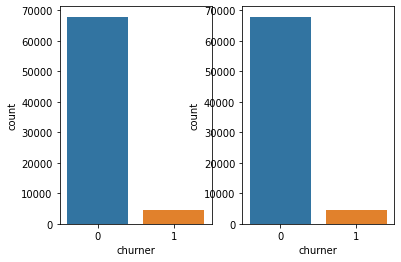

In [36]:
fig, ax =plt.subplots(1,2)
sns.countplot(x = "churner", data=df_data, ax=ax[0])
sns.countplot(x = "churner", data=df_data, ax=ax[1])
fig.show()

print("Jeu de données: nombre de 0 : " + str(np.sum(df_data['churner'] == 0)))
print("Jeu de données : nombre de 1 : " + str(np.sum(df_data['churner'] == 1)))
print("")

▶ 8 - Séparation de nos données en jeu d'entrainement et jeu de test :

On choisis une proportion de 80% pour le jeu d'entrainement et de 20% pour le jeu de test.

On met en place une **stratification** : l'idée est de respecter la proportion d'une variable dans les deux jeux (respecter le 1/10 de churner dans le jeu de test et d'entrainement)

On pense à verifier à l'aide de countplot()


(57996, 133) (14499, 133)
3654
54342
913
13586


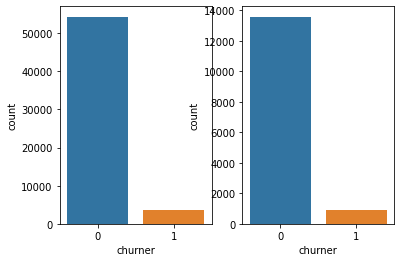

In [37]:
trainset, testset = train_test_split(df_data, test_size=0.2, random_state=0, stratify = df_data['churner'])

print(trainset.shape, testset.shape)

nbrun = np.sum(trainset['churner'] == 1 )
nbrO = np.sum(trainset['churner'] == 0)
print(nbrun)
print(nbrO)
nbrun = np.sum(testset['churner'] == 1 )
nbrO = np.sum(testset['churner'] == 0)
print(nbrun)
print(nbrO)

fig, ax =plt.subplots(1,2)
sns.countplot(x = "churner", data=trainset, ax=ax[0])
sns.countplot(x = "churner", data=testset, ax=ax[1])
fig.show()

In [38]:
trainset.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churner
40344,7000359394,62.721,129.331,147.434,28.08,60.23,44.58,50.61,91.13,126.79,...,0,0,0,0,299,0.0,0.0,0.0,0.0,0
93329,7000994697,152.598,108.200,229.181,14.18,14.84,30.36,97.61,101.19,146.36,...,0,0,0,0,493,0.0,0.0,0.0,0.0,0
59546,7001573271,84.314,167.022,70.015,62.54,167.74,50.26,48.14,64.58,11.88,...,0,0,0,0,412,0.0,0.0,0.0,0.0,0
60063,7000109558,994.295,419.897,0.000,81.34,94.36,0.00,1653.93,637.01,0.00,...,0,0,0,0,214,0.0,0.0,0.0,0.0,0
34232,7001967839,383.839,260.827,37.133,466.59,286.18,38.08,273.44,181.64,20.36,...,0,0,0,0,228,0.0,0.0,0.0,0.0,0


In [39]:
testset.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,churner
78849,7000294285,51.088,64.015,45.675,11.84,24.01,28.73,47.83,36.09,25.64,...,0,0,0,0,1454,0.0,0.0,0.0,0.0,0
27645,7000474282,138.731,5.293,15.600,6.11,0.00,0.00,253.66,1.73,22.48,...,0,0,0,0,679,0.0,0.0,0.0,0.0,0
5916,7001673297,140.173,209.440,179.234,3.84,13.61,6.84,85.73,60.46,76.43,...,0,0,0,0,2369,0.0,0.0,0.0,0.0,0
96894,7001226665,88.541,92.090,156.634,37.29,11.89,24.96,47.03,72.24,112.23,...,0,0,0,0,3123,0.0,0.0,0.0,0.0,0
57984,7000825497,146.728,10.292,39.716,28.16,0.00,6.28,139.88,4.53,17.44,...,0,0,0,0,366,0.0,0.0,0.0,0.0,0


▶ 9 - Téléchargement des deux jeux créés

In [40]:
file_name_test = "churner_test_data_set.csv"

file_name_train = "churner_train_data_set.csv"

trainset.to_csv(file_name_train, index=False)
testset.to_csv(file_name_test, index=False)

#files.download(file_name_test)
#files.download(file_name_train)

▶ 10 - Création d'un sample des jeux :

Par suite de problèmes de performances et des temps de traitement long nous avons pris la décision de, si besoin, utiliser un sample du jeu de données. 

C’est-à-dire une base de données réduites mais qui garde les tendances de proportions de churner et de non-churner. Pour simplifier les choses nous avons divisé notre nombre d’observations par deux. 

On vérifie à l'aide d'un countplot() que les proportions sont bien gardées. 

In [41]:
df_sample_test = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/CHURN/DATA/churner_test_data_set.csv")
df_sample_train = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/CHURN/DATA/churner_train_data_set.csv")

print(df_sample_test.shape, df_sample_train.shape)

(14499, 133) (57996, 133)


3654


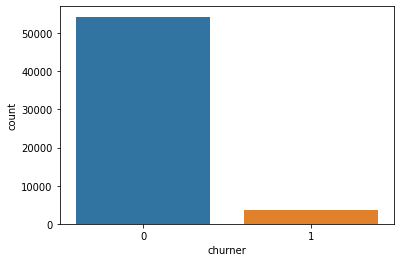

In [42]:
sns.countplot(x = "churner", data=df_sample_train)
print(np.sum(df_sample_train['churner'] == 1))

913


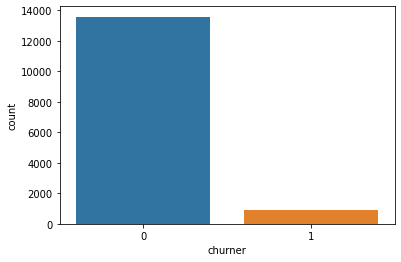

In [43]:
sns.countplot(x = "churner", data=df_sample_test)
print(np.sum(df_sample_test['churner'] == 1))

Division de la base comme si on faisait un jeu de test / entrainement à 50/50 en n'en gardant qu'un. 

In [44]:
df_sample_train_f, bin = train_test_split(df_sample_train, test_size=0.5, random_state=0, stratify = df_sample_train['churner'])
df_sample_test_f, bin = train_test_split(df_sample_test, test_size=0.5, random_state=0, stratify = df_sample_test['churner'])
print(df_sample_test_f.shape, df_sample_train_f.shape)

nbrun = np.sum(df_sample_train_f['churner'] == 1 )
nbrO = np.sum(df_sample_train_f['churner'] == 0)
print(nbrun)
print(nbrO)
nbrun = np.sum(df_sample_test_f['churner'] == 1 )
nbrO = np.sum(df_sample_test_f['churner'] == 0)
print(nbrun)
print(nbrO)

(7249, 133) (28998, 133)
1827
27171
456
6793


1827


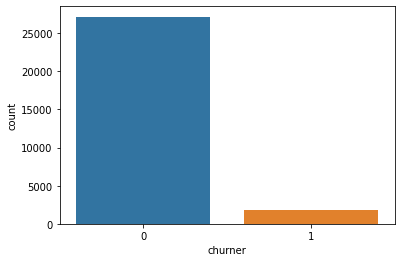

In [45]:
sns.countplot(x = "churner", data=df_sample_train_f)
print(np.sum(df_sample_train_f['churner'] == 1))

456


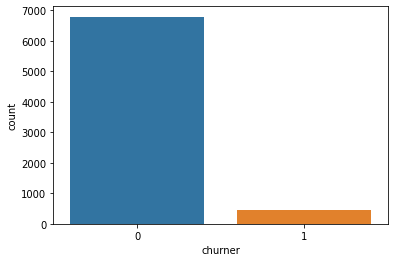

In [46]:
sns.countplot(x = "churner", data=df_sample_test_f)
print(np.sum(df_sample_test_f['churner'] == 1))

Téléchargement des Dataset.

In [47]:
file_name_test = "sample_churner_test_data_set.csv"

file_name_train = "sample_churner_train_data_set.csv"

df_sample_train_f.to_csv(file_name_train, index=False)
df_sample_test_f.to_csv(file_name_test, index=False)

#files.download(file_name_test)
#files.download(file_name_train)